#### Nama: Agustinus Angelo Christian Fernando

#### Email: nando.aacf88@gmail.com

# Persiapan Data

In [ ]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS,add_constant 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso,LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Buka dataset train dan test
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

# Handling Null Values

In [ ]:
# Membuat dataframe yang berisi jumlah null value
null_value = pd.DataFrame()
null_value['variable'] = test.columns
null_value['Train'] = train.drop(labels='SalePrice',axis=1).isnull().sum().to_list()
null_value['Test']=test.isnull().sum().to_list()
null_value

,variable,Train,Test
0,Id,0,0
1,MSSubClass,0,0
2,MSZoning,0,4
3,LotFrontage,259,227
4,LotArea,0,0
...,...,...,...
75,MiscVal,0,0
76,MoSold,0,0
77,YrSold,0,0
78,SaleType,0,1


In [ ]:
# Data yang tidak memiliki null values
no_null_col = null_value[(null_value['Train']==0) & (null_value['Test']==0)].variable.to_list()
no_null_col

['Id',
 'MSSubClass',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleCondition']

In [ ]:
train[no_null_col]

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,2,2008,Normal
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,5,2007,Normal
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,9,2008,Normal
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,2,2006,Abnorml
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,12,2008,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,0,40,0,0,0,0,0,8,2007,Normal
1456,1457,20,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,349,0,0,0,0,0,0,2,2010,Normal
1457,1458,70,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,0,60,0,0,0,0,2500,5,2010,Normal
1458,1459,20,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,366,0,112,0,0,0,0,4,2010,Normal


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train = train[no_null_col]
df_train['SalePrice'] = train['SalePrice']
df_test = test[no_null_col]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


# Normalization SalePrice

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


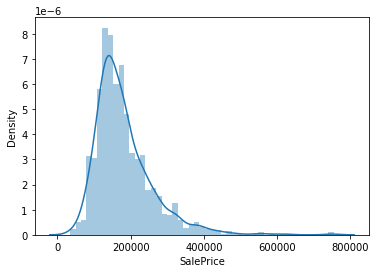

In [ ]:
sns.distplot(df_train['SalePrice'])

Tampak bahwa tidak terdistribusi normal

In [ ]:
# Kita lakukan normalisasi
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


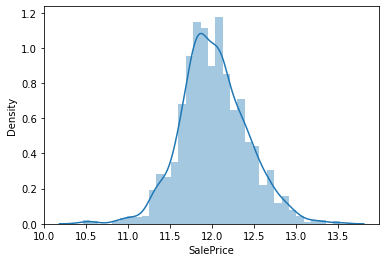

In [ ]:
sns.distplot(df_train['SalePrice'])

Sekarang tampak bahwa data sudah terdistribus normal agar hasil prediksi bisa maksimal

# Encode Data dan Meringkas Feature

In [ ]:
# Meringkas feature
df_train['House_Age'] = df_train.YrSold - df_train.YearBuilt
df_train['RemodAge']  = df_train.YrSold - df_train.YearRemodAdd
df_train.drop(labels=['YrSold','YearBuilt','YearRemodAdd'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


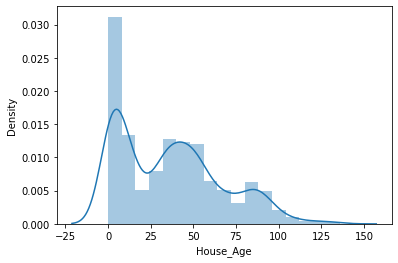

In [ ]:
sns.distplot(df_train['House_Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


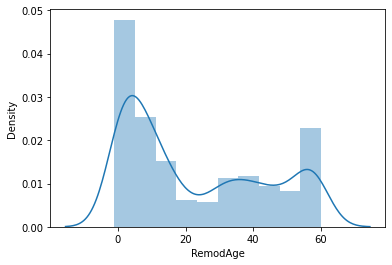

In [ ]:
sns.distplot(df_train['RemodAge'])

In [ ]:
# Meringkas Feature
df_test['House_Age'] = df_test.YrSold - df_test.YearBuilt
df_test['RemodAge']  = df_test.YrSold - df_test.YearRemodAdd
df_test.drop(labels=['YrSold','YearBuilt','YearRemodAdd'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [ ]:
# Meringkas Feature
df_train['Overall_Rating'] = (df_train.OverallCond + df_train.OverallQual)*0.5
df_test['Overall_Rating'] = (df_test.OverallCond + df_test.OverallQual)*0.5
df_train.drop(labels=['OverallQual','OverallCond'],inplace=True,axis=1)
df_test.drop(labels=['OverallQual','OverallCond'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


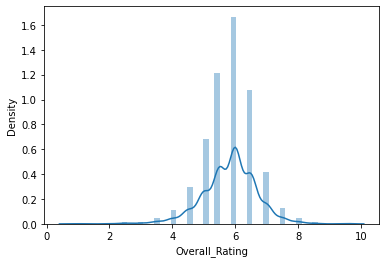

In [ ]:
sns.distplot(df_train['Overall_Rating'])

In [ ]:
# Encode data
df_train = pd.get_dummies(df_train,columns=['MSSubClass'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['MSSubClass'],drop_first=True)

In [ ]:
df_train.columns[df_train.dtypes != 'O']

Index(['Id', 'LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'House_Age', 'RemodAge', 'Overall_Rating', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190'],
      dtype='object')

In [ ]:
# Encode data
df_train = pd.get_dummies(df_train,columns=['MoSold'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['MoSold'],drop_first=True)

In [ ]:
# Encode data
df_train = pd.get_dummies(df_train,columns=['SaleCondition'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['SaleCondition'],drop_first=True)

In [ ]:
# Encode Data
label = {'None':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
df_train.ExterQual.fillna('None',inplace=True)
df_test.ExterQual.fillna('None',inplace=True)
df_train.replace({'ExterQual':label},inplace=True)
df_test.replace({'ExterQual':label},inplace=True)

df_train.ExterCond.fillna('None',inplace=True)
df_test.ExterCond.fillna('None',inplace=True)
df_train.replace({'ExterCond':label},inplace=True)
df_test.replace({'ExterCond':label},inplace=True)

df_train['External_QC'] = (df_train.ExterCond + df_train.ExterQual)*0.5
df_test['External_QC'] = (df_test.ExterCond + df_test.ExterQual)*0.5

df_train.drop(labels=['ExterQual','ExterCond'],inplace=True,axis=1)
df_test.drop(labels=['ExterQual','ExterCond'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


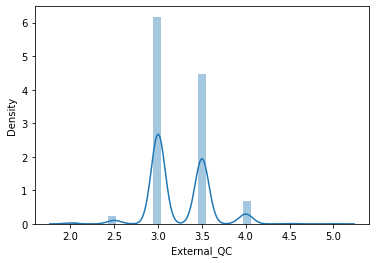

In [ ]:
sns.distplot(df_train['External_QC'])

In [ ]:
df_train['Fireplaces'].dtypes

dtype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


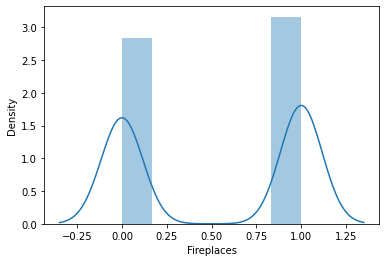

In [ ]:
# Kita ubah skala fireplaces menjadi ada (1) atau tidak ada (0)
df_train.Fireplaces = (df_train.Fireplaces>0).astype(int)
df_test.Fireplaces = (df_test.Fireplaces>0).astype(int)

sns.distplot(df_train['Fireplaces'])

In [ ]:
# Encode data
df_train['Street'].replace(['Pave','Grvl'],[0,1],inplace=True)
df_test['Street'].replace(['Pave','Grvl'],[0,1],inplace=True)

In [ ]:
# Kolom yang akan di encode 
dum_var = ['LotShape','LandContour','LandSlope','LotConfig','Neighborhood','RoofStyle','PavedDrive','Foundation']

In [ ]:
# Encode Data
df_train = pd.get_dummies(df_train,columns=dum_var,drop_first=True)
df_test = pd.get_dummies(df_test,columns=dum_var,drop_first=True)

In [ ]:
# Encode Data
label = {'None':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
df_train.HeatingQC.fillna('None',inplace=True)
df_test.HeatingQC.fillna('None',inplace=True)
df_train.replace({'HeatingQC':label},inplace=True)
df_test.replace({'HeatingQC':label},inplace=True)

In [ ]:
# Data yang tidak diperlukan
drop_obj = df_train.columns[df_train.dtypes == 'O'].to_list()
drop_obj

['Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Heating',
 'CentralAir']

In [ ]:
# Drop data yang tidak diperlukan
df_train.drop(labels=drop_obj,inplace=True,axis=1)
df_test.drop(labels=drop_obj,inplace=True,axis=1)

In [ ]:
df_train.isnull().sum().max()

0

In [ ]:
train['Fence']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object

In [ ]:
df_train['Fence'] = train.Fence
df_test['Fence'] = test.Fence

df_train.fillna(0,inplace=True)
df_test.fillna(0,inplace=True)

In [ ]:
df_train['Fence'].unique()

array([0, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
# Ubah data fence ke 0 dan 1
df_train.Fence = (df_train.Fence!=0).astype(int)
df_test.Fence = (df_test.Fence!=0).astype(int)

In [ ]:
df_train['Fence'].unique()

array([0, 1])

In [ ]:
df_train.columns

Index(['Id', 'LotArea', 'Street', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       ...
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'PavedDrive_P', 'PavedDrive_Y',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Fence'],
      dtype='object', length=105)

# Mempersiapkan Model

In [ ]:
X = df_train.drop('SalePrice',axis=1)
y = df_train[['SalePrice']]

print(X.shape)
print(y.shape)

(1460, 104)
(1460, 1)


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1168, 104), (292, 104))

# Prediksi Menggunakan Linear Regression

In [ ]:
Linear_Model = LinearRegression()
Linear_Model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = Linear_Model.predict(X_test) #Prediction on test data  
pred_train = Linear_Model.predict(X_train) # prediction on train data

# Evaluasi Hasil Prediksi (MAE, RMSE, R2 Score)

## Mean Absolute Error

In [ ]:
print(f"Mean absolute error of test data = {mean_absolute_error(y_test, pred)}")
print(f"Mean absolute error of train data = {mean_absolute_error(y_train, pred_train)}")

Mean absolute error of test data = 0.10637873821123432
Mean absolute error of train data = 0.09046391269787595


## RMSE

In [ ]:
print(f"RMSE of test data = {mean_squared_error(y_test, pred , squared=False)}")
print(f"RMSE of train data = {mean_squared_error(y_train, pred_train,squared=False)}")

RMSE of test data = 0.14920619107647287
RMSE of train data = 0.13047444689765467


## Score R2

In [ ]:
print(f"Score R2 of test data = {r2_score(y_test, pred)}")
print(f"Score R2 of train data = {r2_score(y_train, pred_train)}")

Score R2 of test data = 0.8807010904133997
Score R2 of train data = 0.8883278055808814


### Tampak bahwa **score** hasil prediksi yang didapat sudah **tinggi**

# Tambahan evaluasi hasil prediksi

In [ ]:
# Selisih antara SalePrice aktual dengan hasil prediksi
res_df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': pred.flatten()})
res_df['residual'] = res_df['Actual'] - res_df['Predicted']

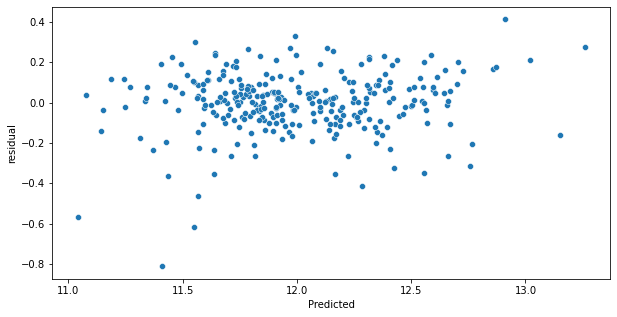

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=res_df['Predicted'],y=res_df['residual'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


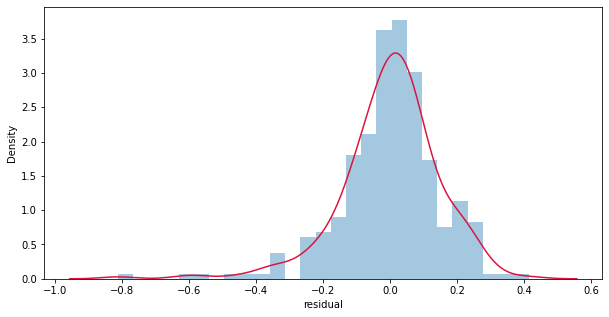

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.distplot(res_df['residual'])
ax.lines[0].set_color('crimson')
plt.show()

### Tampak bahwa sebagian besar hasil prediksi memiliki residual **di sekitar 0**.
### Maka, hasil prediksi bisa dikatakan **bagus.**